In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go # 시각화 
import statsmodels.formula.api as smf

import warnings 
warnings.filterwarnings(action = 'ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.decomposition import NMF 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy.linalg import svd 
from scipy.sparse.linalg import svds
from factor_analyzer import FactorAnalyzer # 요인분석 install 

# clustering 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

from sklearn.mixture import GaussianMixture

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch 
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

#KPrototypes ; 범주형, 수치형 둘 다 고려한 알고리즘 install 
from kmodes.kprototypes import KPrototypes

#KModes ; 범주형 데이터를 고려한 클러스터링 알고리즘 
from kmodes.kmodes import KModes

from matplotlib import font_manager, rc 
font_path ='C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() 
rc('font', family = font)

# recommentation 

from surprise import Reader

# text 

from konlpy.tag import Okt
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

le = LabelEncoder() 
ms = MinMaxScaler() 
ss = StandardScaler() 
rs = RobustScaler() # 이상치에 강한

In [2]:
data = pd.read_csv('C:/Users/fsecuser507/analysis_data.csv',index_col=0)

In [3]:
data.결제고객수.describe()

count    1.363537e+07
mean     2.251250e+01
std      8.175920e+01
min      3.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.700000e+01
max      6.969000e+03
Name: 결제고객수, dtype: float64

<AxesSubplot:ylabel='결제고객수'>

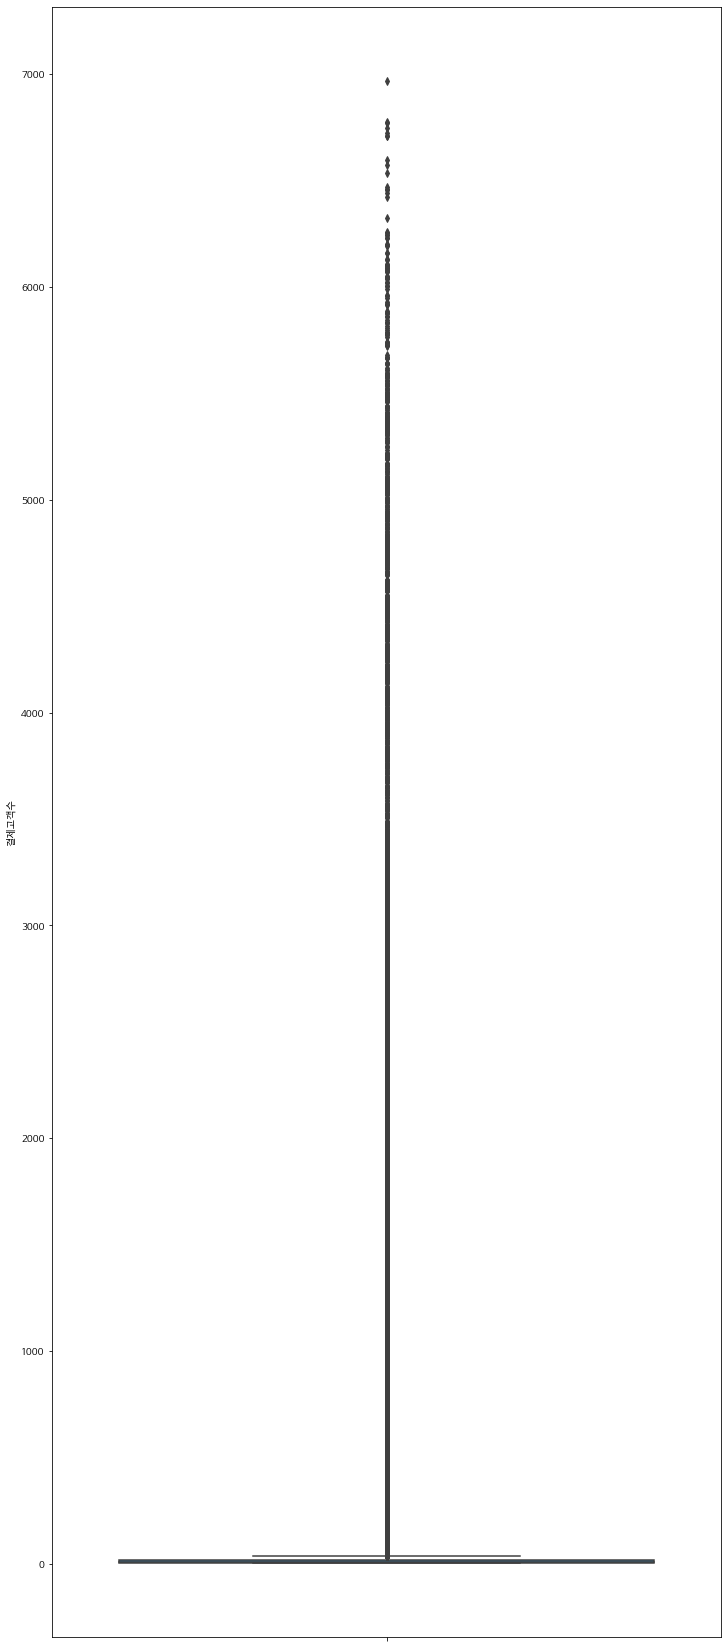

In [4]:
plt.figure(figsize = (12,30))
sns.boxplot(y = data.결제고객수)

In [5]:
data.groupby(['상품대분류','상품중분류']).agg({'상품중분류' : 'count'})

# 생활잡화 : 문구용품, 생활용품
# 신변잡화 : 세안/위생용품, 화장품/패션잡화
# 의약건강기능 : 건강기능(숙취해소제(음료 제외), 영양제 상품 등) , 상비약/의약외품
# 취미/레저 : 서적/신문/음반, 소형가전(폰 충전기, 이어폰, 컴퓨터용품(USB 등) 등), 애완용품, 여행용상품, 완구류

상품중분류
상품대분류   상품중분류               
가공식사제품  가공식사제품        401803
        면류            610451
간편식사    간편식파스타/샐러드     22227
        김밥            337710
        도시락           248741
        샌드위치/햄버거      389220
        주먹밥           439998
과자류     비스켓/스낵/시리얼    636788
        초콜릿/캔디/껌      547063
담배      담배            975451
빵/떡/디저트 디저트           230055
        빵/떡           370809
생활잡화    문구용품          327211
        생활용품          296588
식재료     과일/채소         102123
        식재료/반찬        305858
        커피차류           98208
신변잡화    세안/위생용품       347049
        화장품/패션잡화      113634
아이스크림   아이스크림         338563
안주류     안주류           542414
음료      과일야채음료        391634
        기능건강음료        583111
        생수/차음료        656238
        얼음/아이스드링크     503828
        유제품           692148
        커피음료          701185
        탄산음료          545928
의약건강기능  건강기능           67956
        상비약/의약외품      301839
주류      맥주            460814
        소주/전통주        439133
        와인/양주          49757
즉석조리    제조음료          276318
        튀김/베이커리/군고구마  199574
취미/레저   서적/신문/음반         821
        소형가전           31481
        애완용품           22438
        여행용상품          11205
        완구류            17994

**split_df 만들기 : feature importance**

In [6]:
split_df = data[['주변입지','AGE']].drop_duplicates().reset_index(drop=True)
split_df = split_df.sort_values(by=['주변입지','AGE'])

In [7]:
num_cols = ['결제수량', '결제금액', '결제고객수']
cat_cols = ['month', '요일', '결제시간', '가구생애','접근성']

In [8]:
# feature importance 기준 변수 선택 

columns_list=[]

for k in list(split_df.주변입지.unique()) :


        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '운영점포수', '주변입지', 'AGE','상품중분류','단가','상품대분류'], axis=1)

                df = small.copy()
                
                df[num_cols] = rs.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)


                # 변수중요도 리스트 저장 
                sorted_idx = rf.feature_importances_.argsort()[:15]
                columns_list.append(X.columns[sorted_idx].values)

                

In [9]:
split_df['f_i'] = columns_list

split_df.reset_index(drop=True,inplace=True) # 끝에서부터 상위 순위

split_df['first']  = ' '
split_df['second'] =' '


for i in range(len(split_df)) : 
    
    split_df['first'][i] = list(split_df['f_i'][i])[-1]
    split_df['second'][i] = list(split_df['f_i'][i])[-2]

In [10]:
split_df

,주변입지,AGE,f_i,first,second
0,가족주택,20,"[요일, month, SEX, 가구생애, 접근성, 결제시간]",결제시간,접근성
1,가족주택,30,"[요일, month, 결제시간, SEX, 접근성, 가구생애]",가구생애,접근성
2,가족주택,40,"[요일, month, SEX, 접근성, 결제시간, 가구생애]",가구생애,결제시간
3,가족주택,50,"[요일, month, SEX, 결제시간, 접근성, 가구생애]",가구생애,접근성
4,가족주택,60,"[가구생애, 요일, month, SEX, 결제시간, 접근성]",접근성,결제시간
...,...,...,...,...,...
60,휴게소,20,"[접근성, SEX, 가구생애, 요일, 결제시간, month]",month,결제시간
61,휴게소,30,"[접근성, SEX, 결제시간, 요일, 가구생애, month]",month,가구생애
62,휴게소,40,"[접근성, SEX, 요일, 결제시간, month, 가구생애]",가구생애,month
63,휴게소,50,"[접근성, SEX, 가구생애, 요일, 결제시간, month]",month,결제시간


In [11]:
#split_df.to_csv('C:/Users/fsecuser507/split_df.csv')